In [967]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [968]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [969]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [970]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

/tmp/ipykernel_68177/207623365.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)


,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [971]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [972]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [973]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.drop(['최저기온(℃)'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [974]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [975]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [976]:
df_temp.head()

,평균기온(℃),최고기온(℃)
일시,,
1970-01-01,1.33125,6.86875
1970-01-02,1.86875,5.88125
1970-01-03,0.21250,4.08125
1970-01-04,-6.36250,-2.43750
1970-01-05,-9.46875,-4.73125


In [977]:
df_korea = df_korea.reset_index()

In [978]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


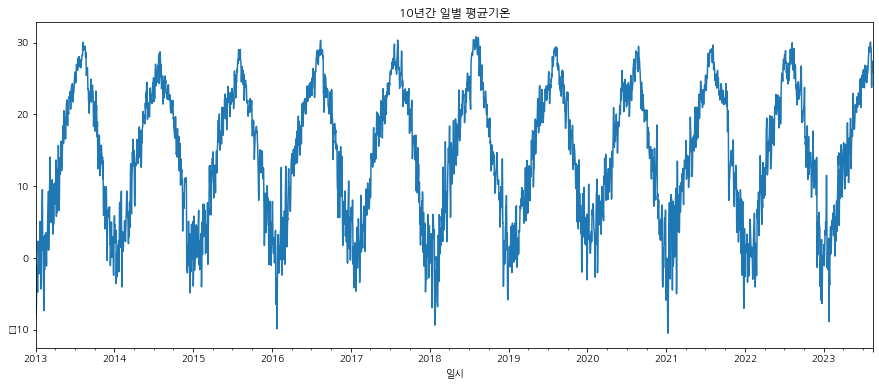

In [979]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


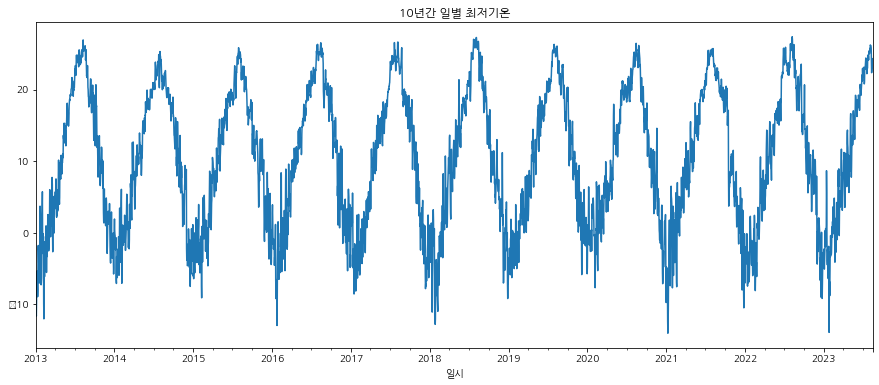

In [980]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

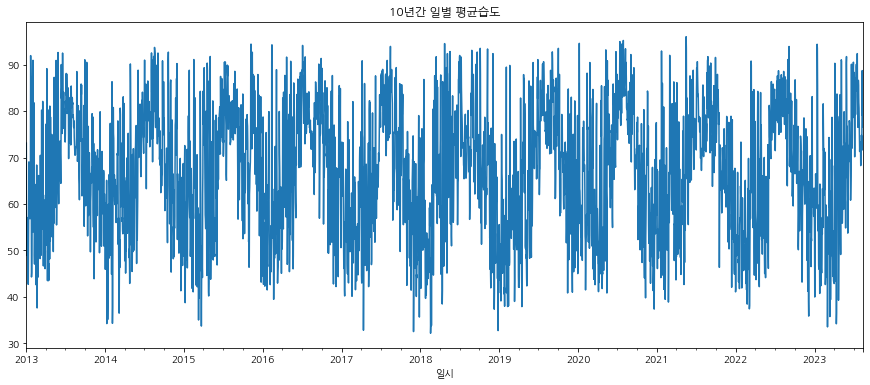

In [981]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

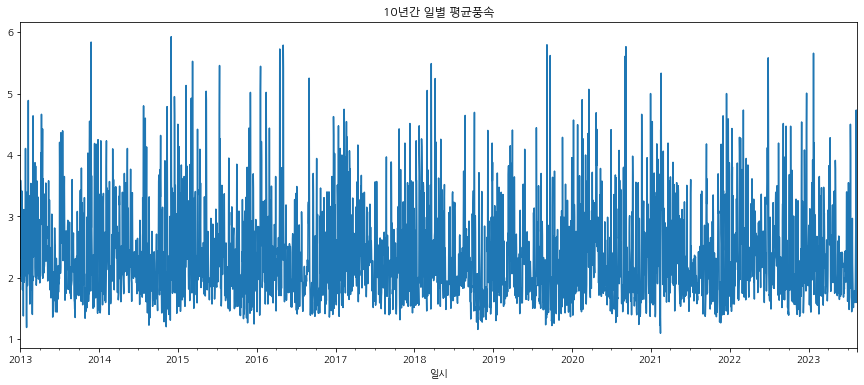

In [982]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [983]:
n_col = 1
#dataset = df_korea['평균기온(℃)']
dataset = df_temp['평균기온(℃)']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 1)

In [984]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [985]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [986]:
dataset.iloc[0:train_size, :]

,평균기온(℃)
일시,
1970-01-01,1.33125
1970-01-02,1.86875
1970-01-03,0.21250
1970-01-04,-6.36250
1970-01-05,-9.46875
...,...
2010-03-15,10.04375
2010-03-16,3.85000
2010-03-17,3.16250


In [987]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 1)

## Creating Data Set

In [988]:
x_train = []
y_train = []
time_step = 60
n_col = 1

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888],
       [0.29945554],
       [0.25937689],
       [0.10027223],
       [0.02510587],
       [0.24319419],
       [0.22837266],
       [0.23835451],
       [0.17211131],
       [0.20220811],
       [0.23275862],
       [0.33318209],
       [0.15366001],
       [0.09195402],
       [0.06488203],
       [0.05792498],
       [0.0738052 ],
       [0.12885662],
       [0.17029643],
       [0.1822444 ],
       [0.22081065],
       [0.28055051],
       [0.25831821],
       [0.17422868],
       [0.20886267],
       [0.2484876 ],
       [0.29401089],
       [0.3200242 ],
       [0.32577132],
       [0.31064731],
       [0.24863884],
       [0.29068361],
       [0.26497278],
       [0.26966122],
       [0.20765275],
       [0.16409558],
       [0.2146098 ],
       [0.30066546],
       [0.30490018],
       [0.13157895],
       [0.16394434],
       [0.28372656],
       [0.36479129],
       [0.39730792],
       [0.33605566],
       [0.3245614 ],
       [0.301724

60 3169
60 3170
60 3171
60 3172
60 3173
60 3174
60 3175
60 3176
60 3177
60 3178
60 3179
60 3180
60 3181
60 3182
60 3183
60 3184
60 3185
60 3186
60 3187
60 3188
60 3189
60 3190
60 3191
60 3192
60 3193
60 3194
60 3195
60 3196
60 3197
60 3198
60 3199
60 3200
60 3201
60 3202
60 3203
60 3204
60 3205
60 3206
60 3207
60 3208
60 3209
60 3210
60 3211
60 3212
60 3213
60 3214
60 3215
60 3216
60 3217
60 3218
60 3219
60 3220
60 3221
60 3222
60 3223
60 3224
60 3225
60 3226
60 3227
60 3228
60 3229
60 3230
60 3231
60 3232
60 3233
60 3234
60 3235
60 3236
60 3237
60 3238
60 3239
60 3240
60 3241
60 3242
60 3243
60 3244
60 3245
60 3246
60 3247
60 3248
60 3249
60 3250
60 3251
60 3252
60 3253
60 3254
60 3255
60 3256
60 3257
60 3258
60 3259
60 3260
60 3261
60 3262
60 3263
60 3264
60 3265
60 3266
60 3267
60 3268
60 3269
60 3270
60 3271
60 3272
60 3273
60 3274
60 3275
60 3276
60 3277
60 3278
60 3279
60 3280
60 3281
60 3282
60 3283
60 3284
60 3285
60 3286
60 3287
60 3288
60 3289
60 3290
60 3291
60 3292
60 3293


60 6174
60 6175
60 6176
60 6177
60 6178
60 6179
60 6180
60 6181
60 6182
60 6183
60 6184
60 6185
60 6186
60 6187
60 6188
60 6189
60 6190
60 6191
60 6192
60 6193
60 6194
60 6195
60 6196
60 6197
60 6198
60 6199
60 6200
60 6201
60 6202
60 6203
60 6204
60 6205
60 6206
60 6207
60 6208
60 6209
60 6210
60 6211
60 6212
60 6213
60 6214
60 6215
60 6216
60 6217
60 6218
60 6219
60 6220
60 6221
60 6222
60 6223
60 6224
60 6225
60 6226
60 6227
60 6228
60 6229
60 6230
60 6231
60 6232
60 6233
60 6234
60 6235
60 6236
60 6237
60 6238
60 6239
60 6240
60 6241
60 6242
60 6243
60 6244
60 6245
60 6246
60 6247
60 6248
60 6249
60 6250
60 6251
60 6252
60 6253
60 6254
60 6255
60 6256
60 6257
60 6258
60 6259
60 6260
60 6261
60 6262
60 6263
60 6264
60 6265
60 6266
60 6267
60 6268
60 6269
60 6270
60 6271
60 6272
60 6273
60 6274
60 6275
60 6276
60 6277
60 6278
60 6279
60 6280
60 6281
60 6282
60 6283
60 6284
60 6285
60 6286
60 6287
60 6288
60 6289
60 6290
60 6291
60 6292
60 6293
60 6294
60 6295
60 6296
60 6297
60 6298


60 9925
60 9926
60 9927
60 9928
60 9929
60 9930
60 9931
60 9932
60 9933
60 9934
60 9935
60 9936
60 9937
60 9938
60 9939
60 9940
60 9941
60 9942
60 9943
60 9944
60 9945
60 9946
60 9947
60 9948
60 9949
60 9950
60 9951
60 9952
60 9953
60 9954
60 9955
60 9956
60 9957
60 9958
60 9959
60 9960
60 9961
60 9962
60 9963
60 9964
60 9965
60 9966
60 9967
60 9968
60 9969
60 9970
60 9971
60 9972
60 9973
60 9974
60 9975
60 9976
60 9977
60 9978
60 9979
60 9980
60 9981
60 9982
60 9983
60 9984
60 9985
60 9986
60 9987
60 9988
60 9989
60 9990
60 9991
60 9992
60 9993
60 9994
60 9995
60 9996
60 9997
60 9998
60 9999
60 10000
60 10001
60 10002
60 10003
60 10004
60 10005
60 10006
60 10007
60 10008
60 10009
60 10010
60 10011
60 10012
60 10013
60 10014
60 10015
60 10016
60 10017
60 10018
60 10019
60 10020
60 10021
60 10022
60 10023
60 10024
60 10025
60 10026
60 10027
60 10028
60 10029
60 10030
60 10031
60 10032
60 10033
60 10034
60 10035
60 10036
60 10037
60 10038
60 10039
60 10040
60 10041
60 10042
60 10043
60 1

60 13878
60 13879
60 13880
60 13881
60 13882
60 13883
60 13884
60 13885
60 13886
60 13887
60 13888
60 13889
60 13890
60 13891
60 13892
60 13893
60 13894
60 13895
60 13896
60 13897
60 13898
60 13899
60 13900
60 13901
60 13902
60 13903
60 13904
60 13905
60 13906
60 13907
60 13908
60 13909
60 13910
60 13911
60 13912
60 13913
60 13914
60 13915
60 13916
60 13917
60 13918
60 13919
60 13920
60 13921
60 13922
60 13923
60 13924
60 13925
60 13926
60 13927
60 13928
60 13929
60 13930
60 13931
60 13932
60 13933
60 13934
60 13935
60 13936
60 13937
60 13938
60 13939
60 13940
60 13941
60 13942
60 13943
60 13944
60 13945
60 13946
60 13947
60 13948
60 13949
60 13950
60 13951
60 13952
60 13953
60 13954
60 13955
60 13956
60 13957
60 13958
60 13959
60 13960
60 13961
60 13962
60 13963
60 13964
60 13965
60 13966
60 13967
60 13968
60 13969
60 13970
60 13971
60 13972
60 13973
60 13974
60 13975
60 13976
60 13977
60 13978
60 13979
60 13980
60 13981
60 13982
60 13983
60 13984
60 13985
60 13986
60 13987
60 13988
6

60 17631
60 17632
60 17633
60 17634
60 17635
60 17636
60 17637
60 17638
60 17639
60 17640
60 17641
60 17642
60 17643
60 17644
60 17645
60 17646
60 17647
60 17648
60 17649
60 17650
60 17651
60 17652
60 17653
60 17654
60 17655
60 17656
60 17657
60 17658
60 17659
60 17660
60 17661
60 17662
60 17663
60 17664
60 17665
60 17666
60 17667
60 17668
60 17669
60 17670
60 17671
60 17672
60 17673
60 17674
60 17675
60 17676
60 17677
60 17678
60 17679
60 17680
60 17681
60 17682
60 17683
60 17684
60 17685
60 17686
60 17687
60 17688
60 17689
60 17690
60 17691
60 17692
60 17693
60 17694
60 17695
60 17696
60 17697
60 17698
60 17699
60 17700
60 17701
60 17702
60 17703
60 17704
60 17705
60 17706
60 17707
60 17708
60 17709
60 17710
60 17711
60 17712
60 17713
60 17714
60 17715
60 17716
60 17717
60 17718
60 17719
60 17720
60 17721
60 17722
60 17723
60 17724
60 17725
60 17726
60 17727
60 17728
60 17729
60 17730
60 17731
60 17732
60 17733
60 17734
60 17735
60 17736
60 17737
60 17738
60 17739
60 17740
60 17741
6

In [989]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [990]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [991]:
x_train.shape, y_train.shape

((19525, 60, 1), (19525, 1))

In [992]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'tanh',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = True, activation = 'tanh'),
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'tanh',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = False, activation = 'tanh'),
    keras.layers.Dense(32, activation = 'tanh'),
    keras.layers.Dense(16, activation = 'tanh'),
    keras.layers.Dense(1)
])
m_lstm.summary()
#kernel_regularizer="l2"

2023-08-23 19:42:37.201911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-23 19:42:37.203041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-23 19:42:37.204145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_126 (LSTM)             (None, 60, 50)            10400     
                                                                 
 lstm_127 (LSTM)             (None, 60, 64)            29440     
                                                                 
 lstm_128 (LSTM)             (None, 60, 50)            23000     
                                                                 
 lstm_129 (LSTM)             (None, 64)                29440     
                                                                 
 dense_126 (Dense)           (None, 32)                2080      
                                                                 
 dense_127 (Dense)           (None, 16)                528       
                                                                 
 dense_128 (Dense)           (None, 1)               

2023-08-23 19:42:37.426131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-23 19:42:37.427166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-23 19:42:37.428050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [993]:
m_lstm.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [994]:
h = m_lstm.fit(x_train, y_train, epochs = 10, shuffle=False)

Epoch 1/10


2023-08-23 19:42:37.755314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-23 19:42:37.756056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-23 19:42:37.757163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

611/611 [==============================] - 29s 41ms/step - loss: 0.0145 - mae: 0.0901
Epoch 2/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0100 - mae: 0.0795
Epoch 3/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0071 - mae: 0.0664
Epoch 4/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0058 - mae: 0.0603
Epoch 5/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0063 - mae: 0.0605
Epoch 6/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0031 - mae: 0.0425
Epoch 7/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0036 - mae: 0.0470
Epoch 8/10
611/611 [==============================] - 25s 41ms/step - loss: 0.0026 - mae: 0.0366
Epoch 9/10
346/611 [===============>..............] - ETA: 11s - loss: 0.0033 - mae: 0.0455

KeyboardInterrupt: 

In [ ]:
m_lstm.save('m3_lstm_adam.h5')

In [ ]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

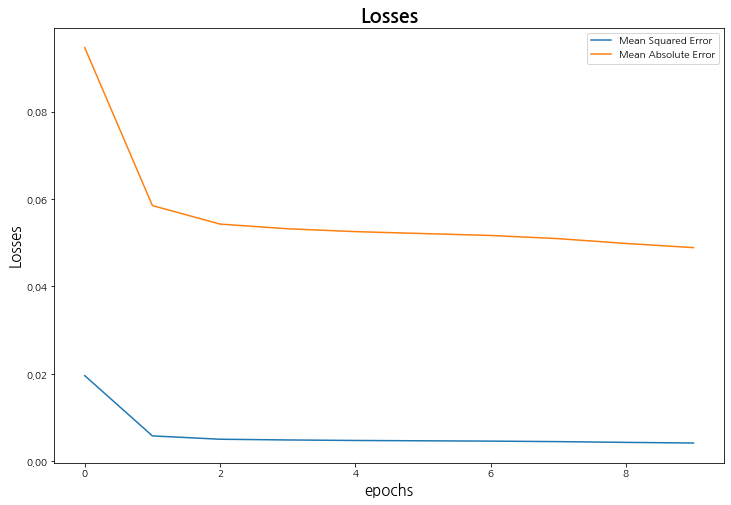

In [956]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [957]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))



60 60
60 61
60 62
60 63
60 64
60 65
60 66
60 67
60 68
60 69
60 70
60 71
60 72
60 73
60 74
60 75
60 76
60 77
60 78
60 79
60 80
60 81
60 82
60 83
60 84
60 85
60 86
60 87
60 88
60 89
60 90
60 91
60 92
60 93
60 94
60 95
60 96
60 97
60 98
60 99
60 100
60 101
60 102
60 103
60 104
60 105
60 106
60 107
60 108
60 109
60 110
60 111
60 112
60 113
60 114
60 115
60 116
60 117
60 118
60 119
60 120
60 121
60 122
60 123
60 124
60 125
60 126
60 127
60 128
60 129
60 130
60 131
60 132
60 133
60 134
60 135
60 136
60 137
60 138
60 139
60 140
60 141
60 142
60 143
60 144
60 145
60 146
60 147
60 148
60 149
60 150
60 151
60 152
60 153
60 154
60 155
60 156
60 157
60 158
60 159
60 160
60 161
60 162
60 163
60 164
60 165
60 166
60 167
60 168
60 169
60 170
60 171
60 172
60 173
60 174
60 175
60 176
60 177
60 178
60 179
60 180
60 181
60 182
60 183
60 184
60 185
60 186
60 187
60 188
60 189
60 190
60 191
60 192
60 193
60 194
60 195
60 196
60 197
60 198
60 199
60 200
60 201
60 202
60 203
60 204
60 205
60 206
60 207
60 2

60 3491
60 3492
60 3493
60 3494
60 3495
60 3496
60 3497
60 3498
60 3499
60 3500
60 3501
60 3502
60 3503
60 3504
60 3505
60 3506
60 3507
60 3508
60 3509
60 3510
60 3511
60 3512
60 3513
60 3514
60 3515
60 3516
60 3517
60 3518
60 3519
60 3520
60 3521
60 3522
60 3523
60 3524
60 3525
60 3526
60 3527
60 3528
60 3529
60 3530
60 3531
60 3532
60 3533
60 3534
60 3535
60 3536
60 3537
60 3538
60 3539
60 3540
60 3541
60 3542
60 3543
60 3544
60 3545
60 3546
60 3547
60 3548
60 3549
60 3550
60 3551
60 3552
60 3553
60 3554
60 3555
60 3556
60 3557
60 3558
60 3559
60 3560
60 3561
60 3562
60 3563
60 3564
60 3565
60 3566
60 3567
60 3568
60 3569
60 3570
60 3571
60 3572
60 3573
60 3574
60 3575
60 3576
60 3577
60 3578
60 3579
60 3580
60 3581
60 3582
60 3583
60 3584
60 3585
60 3586
60 3587
60 3588
60 3589
60 3590
60 3591
60 3592
60 3593
60 3594
60 3595
60 3596
60 3597
60 3598
60 3599
60 3600
60 3601
60 3602
60 3603
60 3604
60 3605
60 3606
60 3607
60 3608
60 3609
60 3610
60 3611
60 3612
60 3613
60 3614
60 3615


In [958]:
m_lstm_Adam.evaluate(x_test, y_test)

2023-08-23 19:41:53.536360: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-23 19:41:53.537078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-23 19:41:53.538123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

154/154 [==============================] - 3s 13ms/step - loss: 0.0042 - mae: 0.0483


[0.004168209154158831, 0.048314642161130905]

In [959]:
pred = m_lstm_Adam.predict(x_test)

2023-08-23 19:41:56.351765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-23 19:41:56.353072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-23 19:41:56.354010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

154/154 [==============================] - 3s 13ms/step


In [960]:
pred.shape

(4897, 1)

In [961]:
pred = scaler.inverse_transform(pred)
pred.shape

(4897, 1)

In [962]:
y_test = scaler.inverse_transform(y_test)

In [963]:
df_pred = pd.DataFrame(data = 
                       {'predict' : pred.flatten(),
                       'actual' : y_test.flatten()})
df_pred

,predict,actual
0,7.486868,11.79375
1,7.519054,5.37500
2,7.641768,5.36250
3,7.683458,7.25625
4,7.678566,8.90625
...,...,...
4892,28.081669,26.24375
4893,27.644430,25.86250
4894,27.252939,26.88750
4895,26.993755,27.40000


Text(0.5, 1.0, 'predict data')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


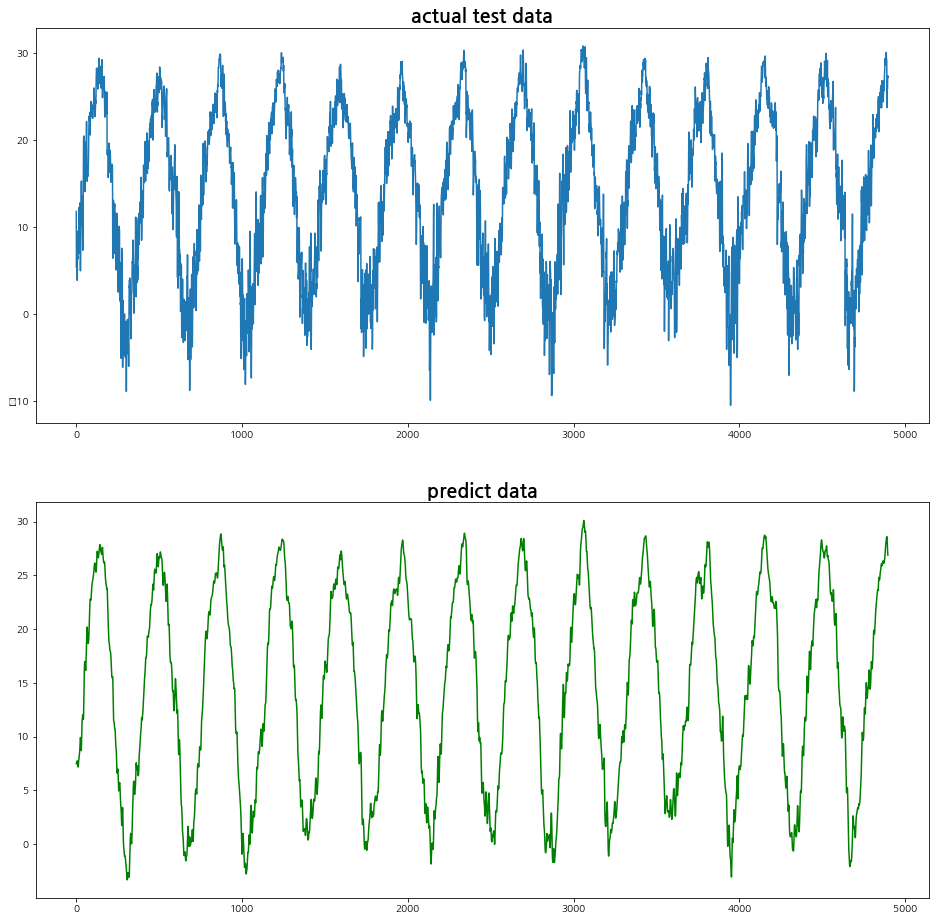

In [964]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['actual'])
axe[1].plot(df_pred['predict'], c = 'g')

axe[0].set_title('actual test data', size = 20, weight = 'bold')
axe[1].set_title('predict data', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

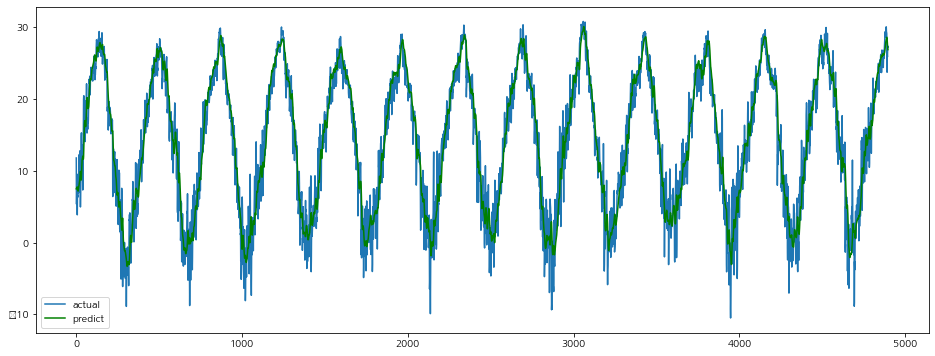

In [965]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(df_pred['actual'])
axe.plot(df_pred['predict'], c = 'g')

axe.legend(['actual', 'predict'])

In [966]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

KeyboardInterrupt: Interrupted by user

In [ ]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(x_test[-1].flatten()[i])
len(last_array)

In [ ]:
for i in range(time_step, d_day):
    print(time_step, i)
    last_ar = np.array(last_array[i-time_step:i])
    print(last_ar)
    array = np.reshape(last_ar, (n_col, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(m_lstm_Adam.predict(array)[0,0])
    print(len(last_array))

In [ ]:
test_pred = np.array(last_array).reshape(len(last_array),1)

In [837]:
len(test_pred)

790

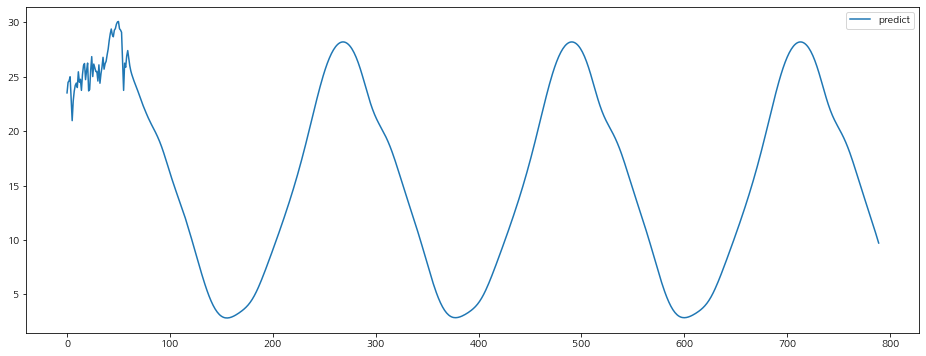

In [839]:
fig, axe = plt.subplots(figsize = (16, 6))
#axe.plot(df_pred['actual'])
axe.plot(scaler.inverse_transform(test_pred))
axe.legend(['predict', 'actual'])

In [845]:
scaler.inverse_transform(test_pred)

array([[23.5125    ],
       [24.48125   ],
       [24.625     ],
       [24.99375   ],
       [23.075     ],
       [20.9625    ],
       [22.75625   ],
       [23.66875   ],
       [24.20625   ],
       [24.4125    ],
       [24.00625   ],
       [25.45      ],
       [24.49375   ],
       [24.7625    ],
       [23.74375   ],
       [25.18125   ],
       [26.01875   ],
       [26.2125    ],
       [24.73125   ],
       [25.55625   ],
       [26.25      ],
       [23.69375   ],
       [23.82      ],
       [25.5875    ],
       [26.84375   ],
       [25.0125    ],
       [26.1625    ],
       [25.8       ],
       [25.475     ],
       [25.49375   ],
       [24.6       ],
       [26.0875    ],
       [24.4       ],
       [25.275     ],
       [25.8875    ],
       [26.78125   ],
       [25.69375   ],
       [26.19375   ],
       [26.4125    ],
       [27.01875   ],
       [27.54375   ],
       [28.325     ],
       [28.9375    ],
       [29.38125   ],
       [28.85625   ],
       [28

In [841]:
test_pred.shape

(790, 1)